### Linear Algebra Experiments with Python Jupyter Notebook

In [2]:
#To support both Python 2 and Python 3
from __future__ import division, print_function, unicode_literals

In [3]:
#Common imports
import os
import numpy as np

In [4]:
#to make notebooks output consistent across notebooks
np.random.seed(42)

In [5]:
#for printing pretty pictures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [6]:
#workspace directory
PROJECT_ROOT_DIR = './Lin_Alg'
CHAPTER_ID = 'BASICS'

In [7]:
def sav_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".jpg")
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='jpg', dpi=300)

## Eigenvalues and eigenvectors

### Let us start by looking at the equation:
$$Ax=\lambda x$$

This looks as if we are trying to solve a system of equations that we are so familiar with through out the course already.  However there are a couple things we may notice:
1. the right side is not exactly another arbitray vector __b__ but a scalar $\lambda$ multiple of the the same unknown vector x
2. we are proposing that the matrix multiplication on left simply be a scalar multiplication with $\lambda$, which we will be happier to do.  In fact the scalar mulptiplication is simply a scaling of the vector in the same direction(see figure below)

Of course you now would be pretty intrigued 
- whether and how this is even possible, and

- if we could get away with a scalar multiplication, why would we ever want to do matrix mulptiplication in the first place.  

The answers are, for every matrix this would happen only for special directions v(__eigenvectors__) and special scalars $\lambda$ (__eigenvalues__) for special to that matrix!

For example, let A =$\begin{bmatrix}
    3&0&-1\\
    2&3&1\\
    -3&4&5\\
    \end{bmatrix}$  b =$\begin{bmatrix}
    1\\
    1\\
    -1\\
    \end{bmatrix}$
    and  $\lambda = 4$   

In [8]:
#In fact
A = np.array([3,0,-1,2,3,1,-3,4,5]).reshape(3,3)
x = np.array([1,1,-1]).reshape(3,1)
print(np.dot(A,x))

[[ 4]
 [ 4]
 [-4]]


In [9]:
#and notice A*x = 4*x
np.dot(A,x)-4*x

array([[0],
       [0],
       [0]])

In [10]:
np.dot(A,x)

array([[ 4],
       [ 4],
       [-4]])

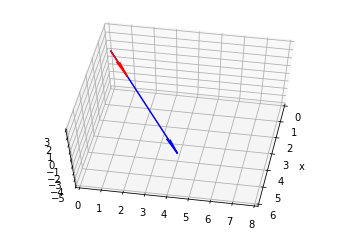

In [17]:
#Now as for item 2:  The matrix multiplication is simply a strech by 4
from mpl_toolkits.mplot3d import Axes3D
vectors = np.array([[0,0,0,1,1,-1],[0,0,0,4,4,-4]])
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
colors=['r','b']
i=0
for vector in vectors:
    v=np.array([vector[3],vector[4],vector[5]])
    vlength = np.linalg.norm(v)
    ax.quiver(vector[0],vector[1],vector[2],vector[3],vector[4],vector[5],
             pivot='tail',arrow_length_ratio=1/vlength,color=colors[i])
    i=+1
ax.set_xlim([0,6])
ax.set_ylim([0,8])
ax.set_zlim([-5,3])
ax.set_xlabel('x')
#ax.set_xlabel('y')
#ax.set_xlabel('z')
ax.view_init(60,10)
#for angle in range(0,360,30):
#    ax.view_init(40,angle)
#    plt.draw()
#    plt.pause(0.001)


__Now it might sound like pretty interesting proposal:  That matrix multiplication can be interpretted simply as a stretch__ In fact it is: much of the rest of the material is somewhat related to this idea.  However, as you know, matrix multiplication is a transformation that scales and rotates vectors.  So if you can factor in the rotation part, then perhaps, everything can be accounted for perhaps using eigenvalues and eigenvectors?!?  The spectral theorem for matrices roughly is just that: matrix multiplication of a sysmmetric matric can be accounted for by a series of strecthes and and rotations!  We need to develop some more tools to get there.